#  <h1 align="center"><B>Usenet Analysis</B></h1>

#### Written By Farjana Anwerbasha

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import glob
from collections import Counter
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
plt.rcParams["figure.figsize"] =(12,9)

##### Question No. : 1
##### How many messages are in each archive?
##### In addition to making the countplot, print the message counts for each archive below the graph.

    File Name of the Archieve 		     | No of counts  
 -----------------------------------------------------------
comp.org.acm.txt                             |          6368
linux.dev.kernel.txt                         |         34484
rec.arts.origami.txt                         |          3569
rec.food.chocolate.txt                       |         17727
sci.fractals.txt                             |         25905


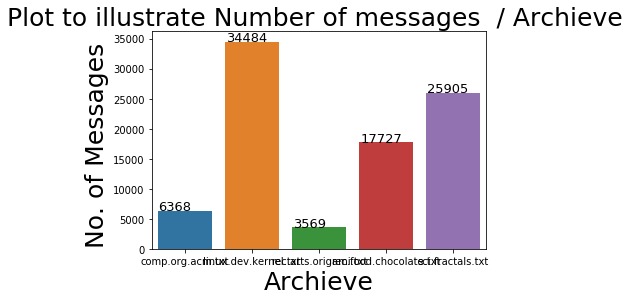

In [2]:
filelist=glob.glob(r'C:\Users\mahre\Desktop\data\data\*.txt')
from_list=[];cnt=0;
print('    File Name of the Archieve','\t\t','    |','No of counts ',"\n","-----------------------------------------------------------")
for filename in filelist:
    with open(filename, encoding='utf-8') as dataIn:
        fname = str(filename).split('\\')[-1:][0]
        count=0
        cnt+=1
        text = dataIn.readlines()
        for line in text:
            if re.match('^From\s', line):
                count+=1
                from_list.append(fname)
        print('{:45}''|    ''{:10}'.format(fname,count))
output_from=pd.DataFrame(from_list,columns=['values'])
ax = sns.countplot(x='values',data=output_from)
ax.set_title('Plot to illustrate Number of messages  / Archieve ', size=25)
ax.set_ylabel('No. of Messages ', size=25)
ax.set_xlabel('Archieve', size=25)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), size=13)
plt.show()


#### Reading all line from the file using readlines() 
#### using regular expression to search for the word starts with 'From' and continue by a single space. '^' is used to check First in a line. '\s' is used to check emplty space.
##### If there is a match, variable 'count' will be incremented.

#### Question No. : 2
##### For each archive, what is the average number of lines per message?

    File Name of the Archieve 		     | Average lines/message  | Total lines in message 
 ------------------------------------------------------------------------------------------------
comp.org.acm.txt                             |            69          |      3967
linux.dev.kernel.txt                         |            36          |      2073
rec.arts.origami.txt                         |            48          |      1224
rec.food.chocolate.txt                       |            41          |      5832
sci.fractals.txt                             |            70          |     14270


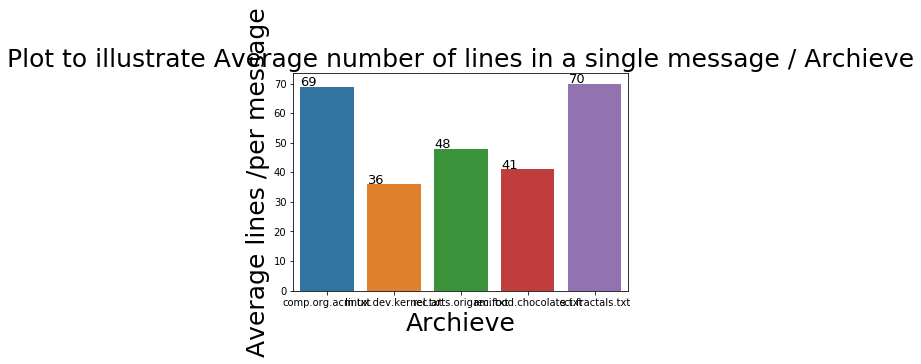

In [3]:
average=[];cnt=0
print('    File Name of the Archieve','\t\t','    |','Average lines/message ','|','Total lines in message',"\n","------------------------------------------------------------------------------------------------")
for filename in filelist:
    with open(filename, encoding='utf-8') as dataIn:
        fname = str(filename).split('\\')[-1:][0]
        total=0;ln=0
        cnt+=1
        text = dataIn.readlines()
        for line in text:
            match = re.search('^Lines: (\d+)', line)
            if match:
                ln+=1
                total=total+int(match.group(1))
        avg=total/ln
        avg_int=int(avg)
        asdf=1
        while asdf <= avg_int:
            average.append(fname)
            asdf+=1
        print('{:45}''|    ''{:10}''          |''{:10}'.format(fname,avg_int, ln))
average_line=pd.DataFrame(average,columns=['values'])
ax = sns.countplot(x='values',data=average_line)
ax.set_title('Plot to illustrate Average number of lines in a single message / Archieve', size=25)
ax.set_xlabel('Archieve', size=25)
ax.set_ylabel('Average lines /per message', size=25)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), size=13)
plt.show()

##### Using regular expression to search for the word starts with 'Lines' and continue by a numeric characters. '^' is used to check First in a line. '\d+' is used to check numeric characters.
##### If there is a match, the numeric value behind t'Lines' will be added to variable 
##### Average is derived by dividing total lines with total number of lines.

#### Question No. : 3
##### Who were the top 5 posters in each group?

In [4]:
for filename in filelist:
    fname = str(filename).split('\\')[-1:][0]
    print('  Name of the Archieve         : ','\n','                     ------------ >>>>>>>', fname,"\n",'\t\t\t\t', "-------------------------------------------------------------")
    print('  User Name ','\t\t','     |','         Registered eMail-id ','\t\t','       |','No. of Posts',"\n","----------------------------------------------------------------------------------------------")
    spl=[];new_list=[];dcount_top=[];mail_list=[];text=[];match=[];m=[];chk_list=[]
    with open(filename, encoding='utf-8') as dataIn:
        text = dataIn.readlines()
        for line in text:
            match = re.search('^From:', line)
            m=re.findall(r'[\w\.-]+@', line)
            if match and m:  mail_list.append(m[0]), new_list.append(line)
    dcount_top=Counter(mail_list).most_common(5)
    for key in dcount_top:
        key_name=key[0]; key_count=key[1]
        for line in new_list:
            user_name=re.search('(.+)%s(.+)' %key_name, line)
            mail1=re.findall(r'[\w\.-]+@[\w\.-]+', line)
            if user_name:
                if mail1:
                    userid=re.findall(r"\<(.*?)\>",line)
                    if userid:
                        id=userid
                    else:
                        userid=re.findall(r"\((.*?)\)",line)
                        if userid:
                            id=userid
                break
        print('{:30}''|''{:40}''          |''{:10}'.format(id[0],mail1[0],key_count))
    print('***********************************************************************************************')

  Name of the Archieve         :  
                      ------------ >>>>>>> comp.org.acm.txt 
 				 -------------------------------------------------------------
  User Name  		      |          Registered eMail-id  		        | No. of Posts 
 ----------------------------------------------------------------------------------------------
Carol Biesecker               |cb@sei.cmu.edu                                    |       154
Toni Veglia                   |toni@usenix.org                                   |       107
JOEKATZ@ACMVM.BITNET          |JOEKATZ@ACMVM.BITNET                              |        91
natty2006@gmail.com           |natty2006@gmail.com                               |        78
Daniel P. Faigin              |faigin@aero.org                                   |        78
***********************************************************************************************
  Name of the Archieve         :  
                      ------------ >>>>>>> linux.dev.kernel.txt 


##### Using regular expression to search for the word pattern starts with 'From:' and continue by a colon and another pattern '[\w\.-].+@' to check @ and all characters before that. If both patterns matches in a line, the first cursor is appended to mail_list. Match line will be appended to new_list.
##### using counter to find top 5 mail id and saved in dcount_top. 
##### To match the mail id with username, this code uses new_list( which is with full line )
##### Pattern is being created to search for mail id saved in dcount_top. This pattern is used to find mailid in new_list. 

#### Question No. : 4
##### For all messages, which mail programs (or user agents) were the most popular for sending messages to Usenet?  Make a countplot of the top 15 user agents. Sort the counts so that they appear from the highest count to the lowest.



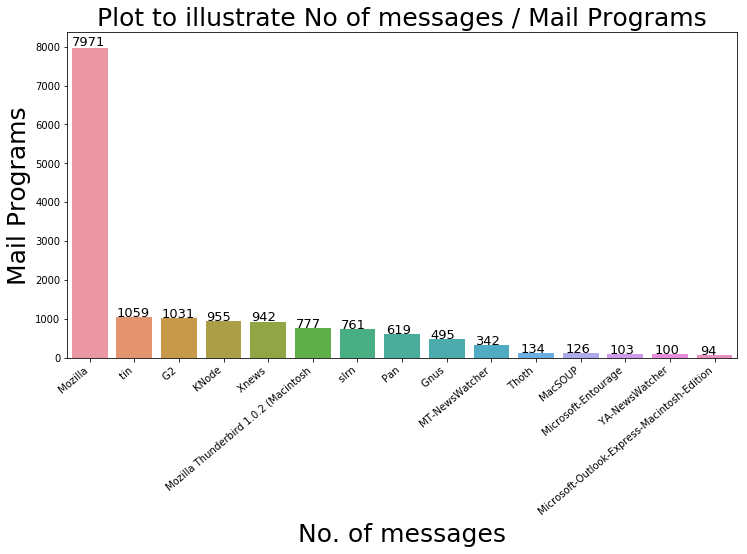

In [5]:
agent_line=[];agent_list=[];agent_final=[]
for filename in filelist:
    with open(filename, encoding='utf-8') as dataIn:
        text = dataIn.readlines()
        for i, line in enumerate(text):
            if re.search('User-Agent', line):
                if text[i+1].startswith('X-H'):
                    agent_line.append(text[i+1])
                else:
                    agent_line.append(text[i])
    for line in agent_line:
        agent=re.findall(r'Agent:=?([^/>]+)', line)
        if agent:
            agent_list.append(agent[0])
top15=Counter(agent_list).most_common(15)
for data in top15:
    key_top=data[0]
    for data in agent_list:
        if data==key_top:
            agent_final.append(data)
agent_pd=pd.DataFrame(agent_final,columns=['values'])
plt.rcParams["figure.figsize"] =(12,6)
ax = sns.countplot(x='values',data=agent_pd)
ax.set_title('Plot to illustrate No of messages / Mail Programs', size=25)
ax.set_xlabel('No. of messages', size=25)
ax.set_ylabel('Mail Programs', size=25)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), size=13)
plt.show()

##### Using regular expression to search for the word pattern starts with 'User-Agent'. Double checking with the next line start from 'X-H'.If the header has 'X-H' the line will be appended to 'agent-line'. ELse, User-Agent line will be appended. 
##### Another pattern has been created to find the values behind 'Agent:' and wil be appended to agent_list.
##### Using counter to find Top 15 and saved in top15

#### Question No. : 6
##### As the World Wide Web grew, use of Usenet fell. Does our data support this statement?

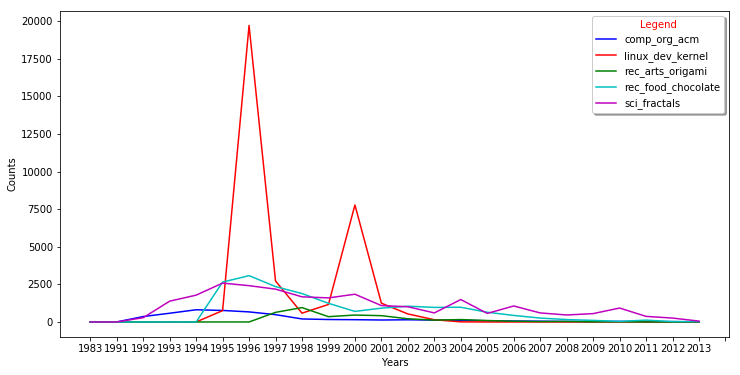

In [6]:
filelist=glob.glob(r'C:\Users\mahre\Desktop\data\data\*.txt')
j=1;countdata={}
for filename in filelist:
    fname = str(filename).split('\\')[-1:][0]
    year_list=[];year_count=[];year_df=pd.DataFrame
    with open(filename, encoding='utf-8') as dataIn:
        text = dataIn.readlines()
        for line in text:
            match = re.search('^Date:', line)
            m2=re.findall(r'.(19[789]\d|20[01]\d)', line)
            if match and m2: year_list.extend(m2)
        countdata[j]=dict(Counter(year_list).most_common())
        j+=1
df=pd.DataFrame({'comp_org_acm':countdata[1],'linux_dev_kernel':countdata[2],
                'rec_arts_origami':countdata[3],'rec_food_chocolate':countdata[4],
               'sci_fractals':countdata[5]})
df['year']=df.index
df.fillna(0,inplace=True)
fig, ax = plt.subplots()
z=list(df.year)
x=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.xticks(x, z)
plt.rcParams["figure.figsize"] =(15,10)
g1=df.comp_org_acm.plot(ax=ax, style='b-');g2=df.linux_dev_kernel.plot(ax=ax, style='r-')
g3=df.rec_arts_origami.plot(ax=ax, style='g-');g4=df.rec_food_chocolate.plot(ax=ax, style='c-')
g5=df.sci_fractals.plot(ax=ax, style='m-')
plt.legend(loc="upper right", bbox_to_anchor=(1,1),ncol=1, shadow=True, title="Legend", fancybox=True)
ax.get_legend().get_title().set_color("red")
plt.xlabel('Years');plt.ylabel('Counts')           
plt.show()

##### Using regular expression to search for the word pattern starts with 'Date'. 
##### Another patter has been created to find date between 1970-2019
##### Output of both pattern will be appended to year_list

#### Question No. : 5
##### Word clouds can act as a type of "fingerprint" for a set of data. Does our data support that statement?

  Name of the Archieve         :  comp.org.acm.txt 
 ----------------------------------------------------------


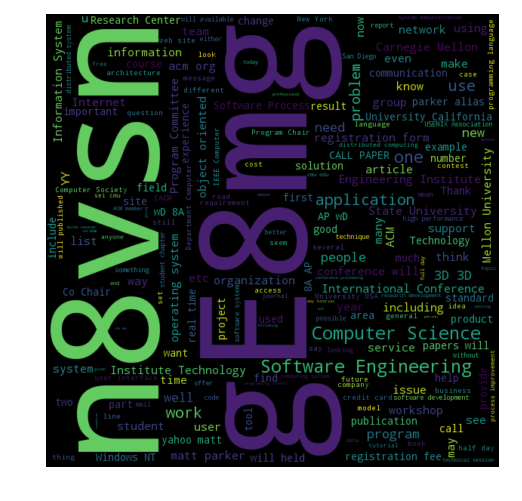

  Name of the Archieve         :  linux.dev.kernel.txt 
 ----------------------------------------------------------


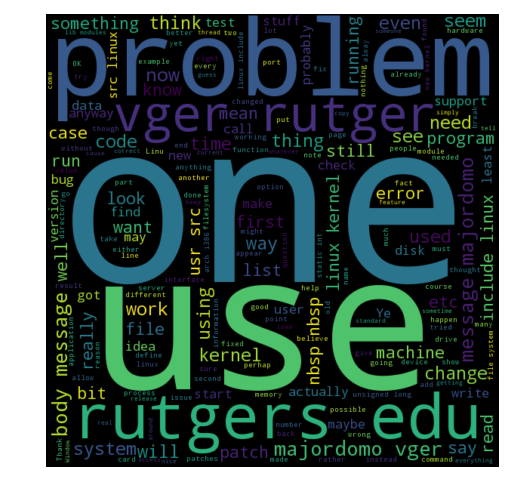

  Name of the Archieve         :  rec.arts.origami.txt 
 ----------------------------------------------------------


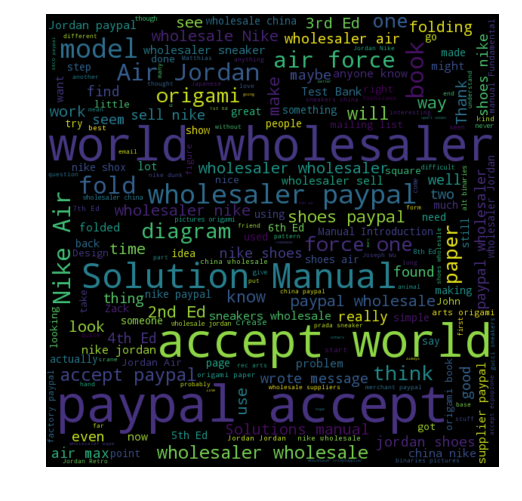

  Name of the Archieve         :  rec.food.chocolate.txt 
 ----------------------------------------------------------


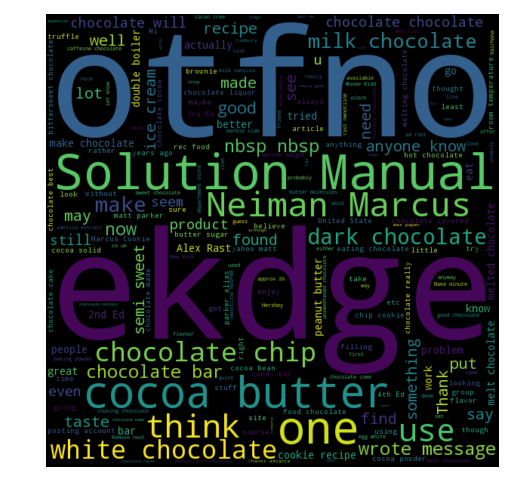

  Name of the Archieve         :  sci.fractals.txt 
 ----------------------------------------------------------


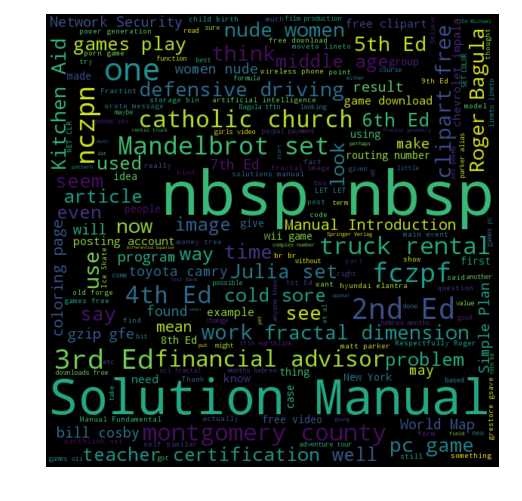

In [7]:
filelist=glob.glob(r'C:\Users\mahre\Desktop\data\data\*.txt')
for filename in filelist:
    fname = str(filename).split('\\')[-1:][0]
    print('  Name of the Archieve         : ', fname,"\n", "----------------------------------------------------------")
    with open(filename, encoding='utf-8') as dataIn:
        text_out='';word_list=[]
        text=dataIn.readlines()
        for i, line in enumerate(text):
            out1=re.findall(r'^From (-)\d+|^From \d+|[A-Z]*:|^$', line)
            if not out1:
                word_list.append(line)
    text_out = ''.join(word_list)
    wc = WordCloud(width=600, height=600, margin=5).generate(text_out)
    plt.figure(figsize=(6,6), dpi=100)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show() 

##### Creating a pattern to check all lines starts with From/From:/Numeric characters/anycharacter followed by colon/empty line. using this pattern match skipping these matches and appending all other lines which doesn't match
##### joining all lines into words using " ''.join(wordlist) "